In [370]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.rcParams['figure.figsize'] = [10, 5]
df = pd.read_excel("data/ireland_hospital_c19_stats.xlsx", sheet_name=0)

#add rolling mean
df["new_deaths_rm"] = df["new_deaths"].rolling(3).mean()
df["c19_icu_cases_rm"] = df["c19_icu_cases"].rolling(3).mean()
df["c19_ventilated_cases_rm"] = df["c19_ventilated_cases"].rolling(3).mean()
df["available_icu_beds_rm"] = df["available_icu_beds"].rolling(3).mean()

df = df[0:24]
df

,date,c19_icu_cases,new_deaths,available_icu_beds,c19_ventilated_cases,new_deaths_rm,c19_icu_cases_rm,c19_ventilated_cases_rm,available_icu_beds_rm
0,2020-04-13,144,31,135,105,NaN,NaN,NaN,NaN
1,2020-04-14,147,41,133,99,NaN,NaN,NaN,NaN
2,2020-04-15,142,38,127,94,36.666667,144.333333,99.333333,131.666667
3,2020-04-16,138,42,115,90,40.333333,142.333333,94.333333,125.000000
4,2020-04-17,132,44,126,88,41.333333,137.333333,90.666667,122.666667
5,2020-04-18,140,41,132,94,42.333333,136.666667,90.666667,124.333333
6,2020-04-19,138,39,142,91,41.333333,136.666667,91.000000,133.333333
7,2020-04-20,138,77,140,94,52.333333,138.666667,93.000000,138.000000
8,2020-04-21,132,44,133,88,53.333333,136.000000,91.000000,138.333333
9,2020-04-22,130,38,140,87,53.000000,133.333333,89.666667,137.666667


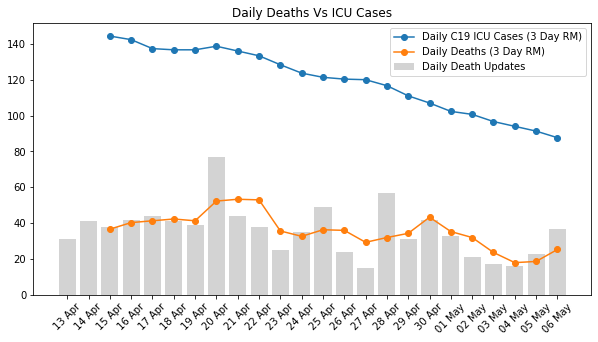

<Figure size 720x360 with 0 Axes>

In [371]:
# ICU Cases vs Deaths
x = df['date']
fig,ax = plt.subplots()
plt.title("Daily Deaths Vs ICU Cases")
plt.plot(x, df['c19_icu_cases_rm'], label="Daily C19 ICU Cases (3 Day RM)",  marker='o')
plt.bar(x, df['new_deaths'], label='Daily Death Updates', color="lightgrey")
plt.plot(x, df['new_deaths_rm'], label='Daily Deaths (3 Day RM)', marker='o')
monthyearFmt = mdates.DateFormatter('%d %b')
ax.xaxis.set_major_formatter(monthyearFmt)
ax.set_xticks(x)
plt.xticks(rotation=45)
plt.legend()
plt.minorticks_off()
plt.savefig("output/daily_deaths_vs_icu.png")
plt.show()

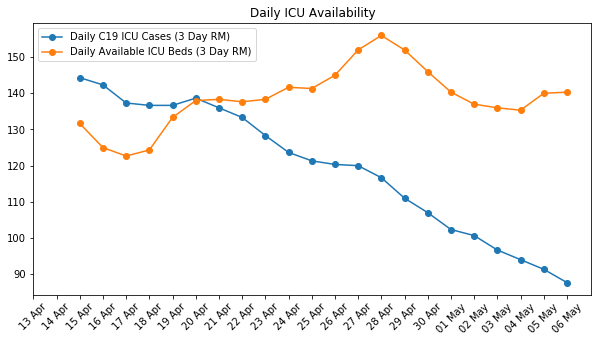

<Figure size 720x360 with 0 Axes>

In [372]:
# ICU Availability
fig,ax = plt.subplots()
plt.title("Daily ICU Availability")
#plt.bar(x, df['c19_icu_cases'], label="Daily C19 ICU Cases")
plt.plot(x, df['c19_icu_cases_rm'], label="Daily C19 ICU Cases (3 Day RM)",  marker='o')
plt.plot(x, df['available_icu_beds_rm'], label='Daily Available ICU Beds (3 Day RM)', marker='o')
monthyearFmt = mdates.DateFormatter('%d %b')
ax.xaxis.set_major_formatter(monthyearFmt)
ax.set_xticks(x)
plt.xticks(rotation=45)
plt.legend()
plt.minorticks_off()
plt.savefig("output/daily_icu_avail.png")
plt.show()

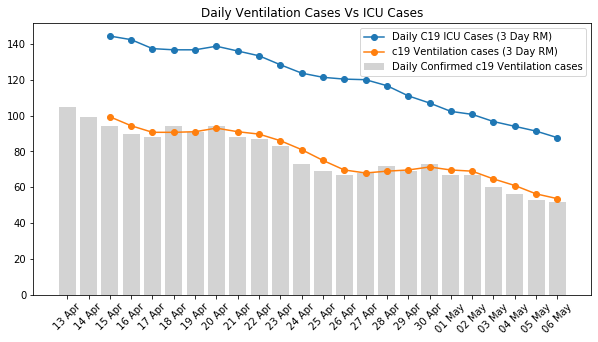

<Figure size 720x360 with 0 Axes>

In [373]:
# ICU Cases Vs Ventilation Case
fig,ax = plt.subplots()
plt.title("Daily Ventilation Cases Vs ICU Cases")
plt.plot(x, df['c19_icu_cases_rm'], label="Daily C19 ICU Cases (3 Day RM)",  marker='o')
plt.bar(x, df['c19_ventilated_cases'], label='Daily Confirmed c19 Ventilation cases', color="lightgrey")
plt.plot(x, df['c19_ventilated_cases_rm'], label='c19 Ventilation cases (3 Day RM)', marker='o')
monthyearFmt = mdates.DateFormatter('%d %b')
ax.xaxis.set_major_formatter(monthyearFmt)
ax.set_xticks(x)
plt.xticks(rotation=45)
plt.legend()
plt.minorticks_off()
plt.savefig("output/daily_ventilation_vs_icu.png")
plt.show()

In [374]:
df_hspc = pd.read_csv("http://opendata-geohive.hub.arcgis.com/datasets/d8eb52d56273413b84b0187a4e9117be_0.csv?outSR={%22latestWkid%22:3857,%22wkid%22:102100}")
df_hspc['Date'] = pd.to_datetime(df_hspc['Date']) # csv file date format was changed to milliseconds
df_hspc['Datestr'] = df_hspc['Date'].dt.strftime('%d/%m')
# add new hospital admissions
df_hspc["HospitalisedCovidCases_new"] = df_hspc["HospitalisedCovidCases"].diff().clip(0)
df_hspc["HospitalisedCovidCases_new_rm"] = df_hspc["HospitalisedCovidCases_new"].rolling(3).mean()

# add ICU
df_hspc["RequiringICUCovidCases_new"] = df_hspc["RequiringICUCovidCases"].diff().clip(0)
df_hspc["RequiringICUCovidCases_new_rm"] = df_hspc["RequiringICUCovidCases_new"].rolling(3).mean()

HospitalisedAged5 = df_hspc["HospitalisedAged5"].diff().clip(0)
df_hspc.insert(14, "HospitalisedAged5_new", HospitalisedAged5)
df_hspc["HospitalisedAged5_new_rm"] = df_hspc["HospitalisedAged5_new"].rolling(3).mean()

HospitalisedAged5to14 = df_hspc["HospitalisedAged5to14"].diff().clip(0)
df_hspc.insert(16, "HospitalisedAged5to14_new", HospitalisedAged5to14)
#add rolling mean
df_hspc["HospitalisedAged5to14_new_rm"] = df_hspc["HospitalisedAged5to14_new"].rolling(3).mean()
# HospitalisedAged15to24
HospitalisedAged15to24 = df_hspc["HospitalisedAged15to24"].diff().clip(0)
df_hspc.insert(18, "HospitalisedAged15to24_new", HospitalisedAged15to24)
df_hspc["HospitalisedAged15to24_new_rm"] = df_hspc["HospitalisedAged15to24_new"].rolling(3).mean()
# HospitalisedAged25to34
HospitalisedAged25to34 = df_hspc["HospitalisedAged25to34"].diff().clip(0)
df_hspc.insert(20, "HospitalisedAged25to34_new", HospitalisedAged25to34)
df_hspc["HospitalisedAged25to34_new_rm"] = df_hspc["HospitalisedAged25to34_new"].rolling(3).mean()
# HospitalisedAged35to44
HospitalisedAged35to44 = df_hspc["HospitalisedAged35to44"].diff().clip(0)
df_hspc.insert(22, "HospitalisedAged35to44_new", HospitalisedAged35to44)
df_hspc["HospitalisedAged35to44_new_rm"] = df_hspc["HospitalisedAged35to44_new"].rolling(3).mean()
# HospitalisedAged45to54
HospitalisedAged45to54 = df_hspc["HospitalisedAged45to54"].diff().clip(0)
df_hspc.insert(24, "HospitalisedAged45to54_new", HospitalisedAged45to54)
df_hspc["HospitalisedAged45to54_new_rm"] = df_hspc["HospitalisedAged45to54_new"].rolling(3).mean()
# HospitalisedAged55to64
HospitalisedAged55to64 = df_hspc["HospitalisedAged55to64"].diff().clip(0)
df_hspc.insert(26, "HospitalisedAged55to64_new", HospitalisedAged55to64)
df_hspc["HospitalisedAged55to64_new_rm"] = df_hspc["HospitalisedAged55to64_new"].rolling(3).mean()
# HospitalisedAged65up
HospitalisedAged65up = df_hspc["HospitalisedAged65up"].diff().clip(0)
df_hspc.insert(28, "HospitalisedAged65up_new", HospitalisedAged65up)
df_hspc["HospitalisedAged65up_new_rm"] = df_hspc["HospitalisedAged65up_new"].rolling(3).mean()

df_hspc = df_hspc.tail(30)
df_hspc.tail()


,Date,StatisticsProfileDate,ConfirmedCovidCases,TotalConfirmedCovidCases,ConfirmedCovidDeaths,TotalCovidDeaths,ConfirmedCovidRecovered,TotalCovidRecovered,CovidCasesConfirmed,HospitalisedCovidCases,...,RequiringICUCovidCases_new,RequiringICUCovidCases_new_rm,HospitalisedAged5_new_rm,HospitalisedAged5to14_new_rm,HospitalisedAged15to24_new_rm,HospitalisedAged25to34_new_rm,HospitalisedAged35to44_new_rm,HospitalisedAged45to54_new_rm,HospitalisedAged55to64_new_rm,HospitalisedAged65up_new_rm
62,2020-05-03 00:00:00+00:00,2020/05/01 00:00:00+00,330,21506,19,1303,13386,13386,21064.0,2825.0,...,0.0,2.666667,1.000000,1.000000,1.000000,1.333333,1.333333,7.000000,5.666667,21.666667
63,2020-05-04 00:00:00+00:00,2020/05/02 00:00:00+00,266,21772,16,1319,13386,13386,21437.0,2840.0,...,1.0,0.666667,0.666667,1.333333,0.666667,1.000000,1.333333,5.000000,2.666667,12.000000
64,2020-05-05 00:00:00+00:00,2020/05/03 00:00:00+00,211,21983,23,1339,13386,13386,21659.0,2879.0,...,5.0,2.000000,0.666667,1.666667,1.000000,2.000000,2.666667,5.333333,3.000000,15.333333
65,2020-05-06 00:00:00+00:00,2020/05/04 00:00:00+00,265,22248,37,1375,13386,13386,21908.0,2878.0,...,4.0,3.333333,0.000000,1.000000,1.000000,1.666667,1.666667,2.666667,0.666667,12.000000
66,2020-05-07 00:00:00+00:00,2020/05/05 00:00:00+00,137,22385,29,1403,21929,21929,22186.0,2891.0,...,3.0,4.000000,0.000000,1.000000,1.666667,1.000000,1.333333,3.000000,1.666667,10.333333


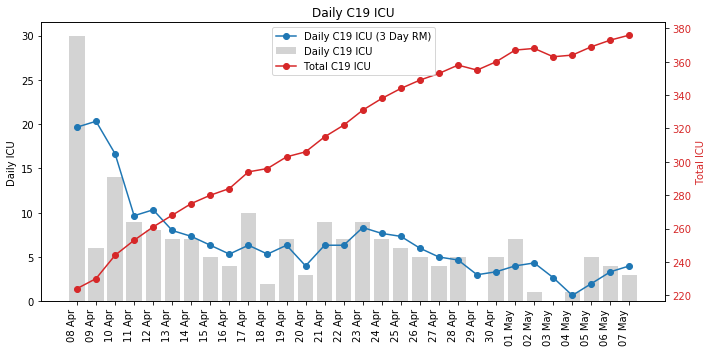

<Figure size 720x360 with 0 Axes>

In [375]:
# C19 ICU
x = df_hspc['Date']
fig,ax1 = plt.subplots()
plt.title("Daily C19 ICU")

ax1.plot(x, df_hspc['RequiringICUCovidCases_new_rm'], label='Daily C19 ICU (3 Day RM)', marker='o', zorder=2)
ax1.bar(x, df_hspc['RequiringICUCovidCases_new'], label='Daily C19 ICU', color="lightgrey", zorder=1)
ax1.set_ylabel('Daily ICU')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.plot(x, df_hspc['RequiringICUCovidCases'], label='Total C19 ICU', marker='o', color=color, zorder=3)
ax2.set_xticks(x)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('Total ICU', color=color)

monthyearFmt = mdates.DateFormatter('%d %b')
ax2.xaxis.set_major_formatter(monthyearFmt)
ax2.set_xticks(x)
#ax2.legend(loc=0)
plt.draw()
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='right')

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper center')

fig.tight_layout()
plt.savefig("output/icu_daily.png")
plt.show()

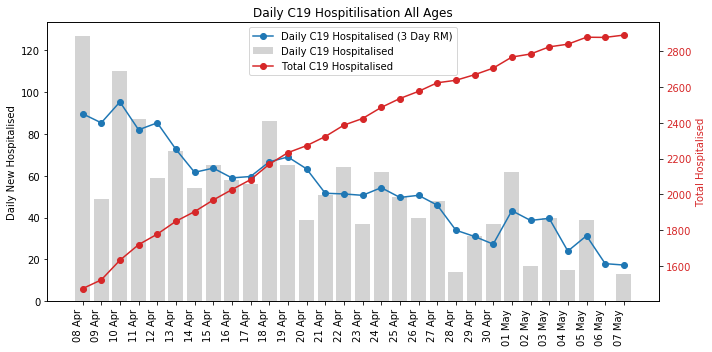

<Figure size 720x360 with 0 Axes>

In [376]:
# Total C19 Hospitilisation
x = df_hspc['Date']
fig,ax1 = plt.subplots()
plt.title("Daily C19 Hospitilisation All Ages")

ax1.plot(x, df_hspc['HospitalisedCovidCases_new_rm'], label='Daily C19 Hospitalised (3 Day RM)', marker='o', zorder=2)
ax1.bar(x, df_hspc['HospitalisedCovidCases_new'], label='Daily C19 Hospitalised', color="lightgrey", zorder=1)
ax1.set_ylabel('Daily New Hospitalised')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.plot(x, df_hspc['HospitalisedCovidCases'], label='Total C19 Hospitalised', marker='o', color=color, zorder=3)
ax2.set_xticks(x)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('Total Hospitalised', color=color)

monthyearFmt = mdates.DateFormatter('%d %b')
ax2.xaxis.set_major_formatter(monthyearFmt)
ax2.set_xticks(x)
plt.draw()
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='right')

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper center')

fig.tight_layout()
plt.savefig("output/hospatilsation_daily_all_ages.png")
plt.show()

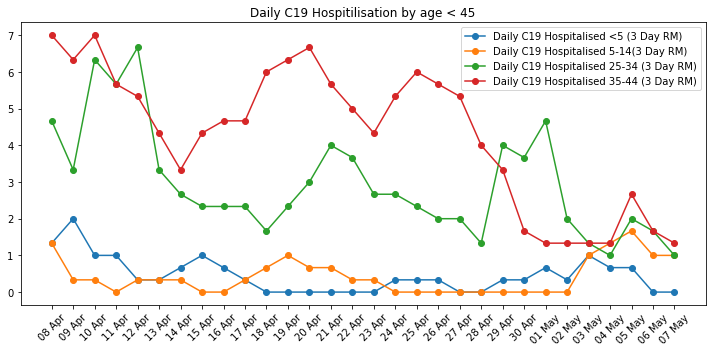

<Figure size 720x360 with 0 Axes>

In [377]:
# Daily C19 Hospitilisation by age < 45
x = df_hspc['Date']
fig,ax = plt.subplots()
plt.title("Daily C19 Hospitilisation by age < 45")
#plt.plot(x, df_hspc['HospitalisedAged5_new'], label='Daily C19 Hospitalised <5', marker='o')
plt.plot(x, df_hspc['HospitalisedAged5_new_rm'], label='Daily C19 Hospitalised <5 (3 Day RM)', marker='o')
#plt.plot(x, df_hspc['HospitalisedAged5to14_new'], label='Daily C19 Hospitalised 5 to 14', marker='o')
plt.plot(x, df_hspc['HospitalisedAged5to14_new_rm'], label='Daily C19 Hospitalised 5-14(3 Day RM)', marker='o')
#plt.plot(x, df_hspc["HospitalisedAged25to34_new"], label='Daily C19 Hospitalised 25 to 34', marker='o')
plt.plot(x, df_hspc["HospitalisedAged25to34_new_rm"], label='Daily C19 Hospitalised 25-34 (3 Day RM)', marker='o')
#plt.plot(x, df_hspc["HospitalisedAged35to44_new"], label='Daily C19 Hospitalised 35 to 44', marker='o')
plt.plot(x, df_hspc["HospitalisedAged35to44_new_rm"], label='Daily C19 Hospitalised 35-44 (3 Day RM)', marker='o')

monthyearFmt = mdates.DateFormatter('%d %b')
ax.xaxis.set_major_formatter(monthyearFmt)
ax.set_xticks(x)
plt.xticks(rotation=45)
plt.legend()
plt.minorticks_off()
plt.tight_layout()
plt.savefig("output/hospatilsation_daily_by_age_less_than_45.png")
plt.show()

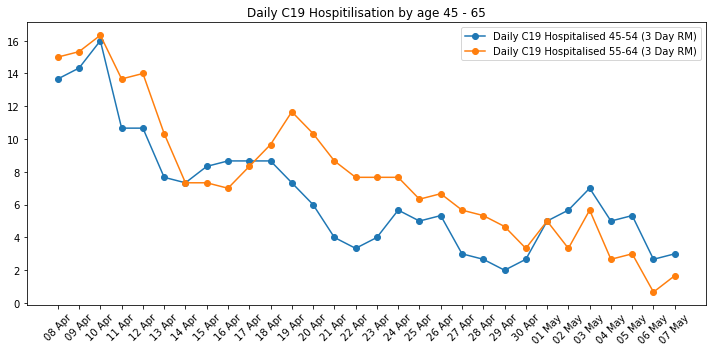

<Figure size 720x360 with 0 Axes>

In [378]:
# Daily C19 Hospitilisation by age 45 - 65
x = df_hspc['Date']
fig,ax = plt.subplots()
plt.title("Daily C19 Hospitilisation by age 45 - 65")
plt.plot(x, df_hspc["HospitalisedAged45to54_new_rm"], label='Daily C19 Hospitalised 45-54 (3 Day RM)', marker='o')
plt.plot(x, df_hspc["HospitalisedAged55to64_new_rm"], label='Daily C19 Hospitalised 55-64 (3 Day RM)', marker='o')

monthyearFmt = mdates.DateFormatter('%d %b')
ax.xaxis.set_major_formatter(monthyearFmt)
ax.set_xticks(x)
plt.xticks(rotation=45)
plt.legend()
plt.minorticks_off()
plt.tight_layout()
plt.savefig("output/hospatilsation_daily_by_age_greater_than_45.png")

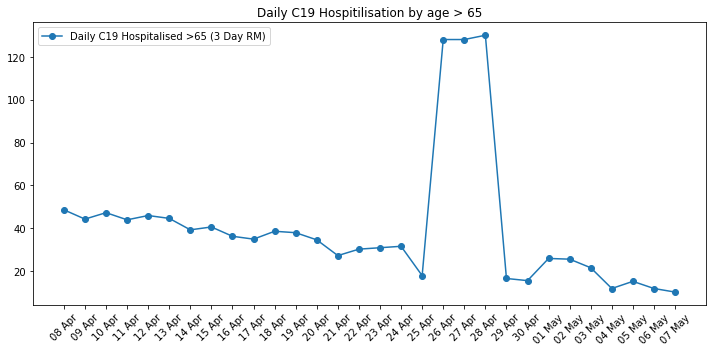

<Figure size 720x360 with 0 Axes>

In [379]:
# Daily C19 Hospitilisation by age > 65
x = df_hspc['Date']
fig,ax = plt.subplots()
plt.title("Daily C19 Hospitilisation by age > 65")
plt.plot(x, df_hspc["HospitalisedAged65up_new_rm"], label='Daily C19 Hospitalised >65 (3 Day RM)', marker='o')

monthyearFmt = mdates.DateFormatter('%d %b')
ax.xaxis.set_major_formatter(monthyearFmt)
ax.set_xticks(x)
plt.xticks(rotation=45)
plt.legend()
plt.minorticks_off()
plt.tight_layout()
plt.show()
plt.savefig("output/hospatilsation_daily_by_age_greater_than_65.png")

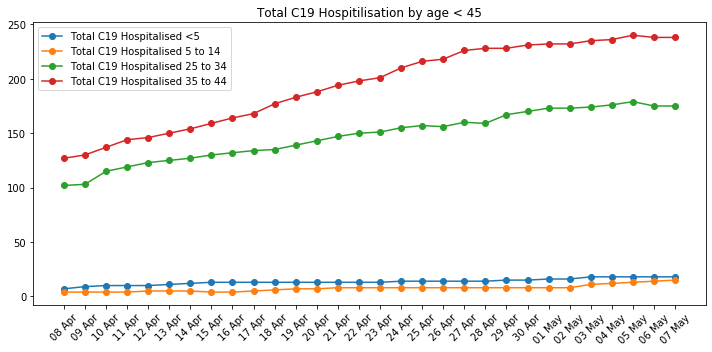

<Figure size 720x360 with 0 Axes>

In [380]:
# Total C19 Hospitilisation by age < 45
x = df_hspc['Date']
fig,ax = plt.subplots()
plt.title("Total C19 Hospitilisation by age < 45")
plt.plot(x, df_hspc['HospitalisedAged5'], label='Total C19 Hospitalised <5', marker='o')
plt.plot(x, df_hspc['HospitalisedAged5to14'], label='Total C19 Hospitalised 5 to 14', marker='o')
plt.plot(x, df_hspc["HospitalisedAged25to34"], label='Total C19 Hospitalised 25 to 34', marker='o')
plt.plot(x, df_hspc["HospitalisedAged35to44"], label='Total C19 Hospitalised 35 to 44', marker='o')

monthyearFmt = mdates.DateFormatter('%d %b')
ax.xaxis.set_major_formatter(monthyearFmt)
ax.set_xticks(x)
plt.xticks(rotation=45)
plt.legend()
plt.minorticks_off()
plt.tight_layout()
plt.show()
plt.savefig("output/hospatilsation_total_by_age_less_than_45.png")

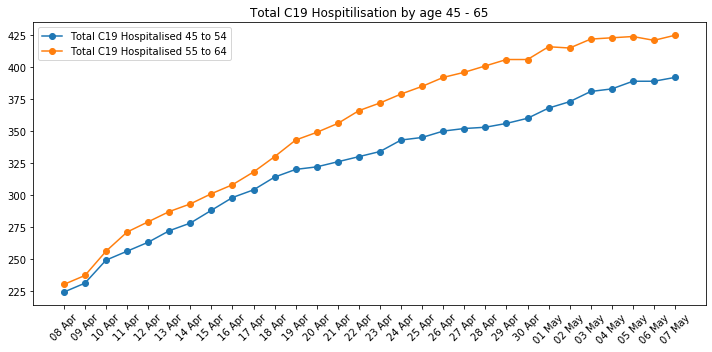

<Figure size 720x360 with 0 Axes>

In [381]:
# Total C19 Hospitilisation by age 45 - 65
x = df_hspc['Date']
fig,ax = plt.subplots()
plt.title("Total C19 Hospitilisation by age 45 - 65")
plt.plot(x, df_hspc["HospitalisedAged45to54"], label='Total C19 Hospitalised 45 to 54', marker='o')
plt.plot(x, df_hspc["HospitalisedAged55to64"], label='Total C19 Hospitalised 55 to 64', marker='o')

monthyearFmt = mdates.DateFormatter('%d %b')
ax.xaxis.set_major_formatter(monthyearFmt)
ax.set_xticks(x)
plt.xticks(rotation=45)
plt.legend()
plt.minorticks_off()
plt.tight_layout()
plt.show()
plt.savefig("output/hospatilsation_total_by_age_greater_than_45.png")

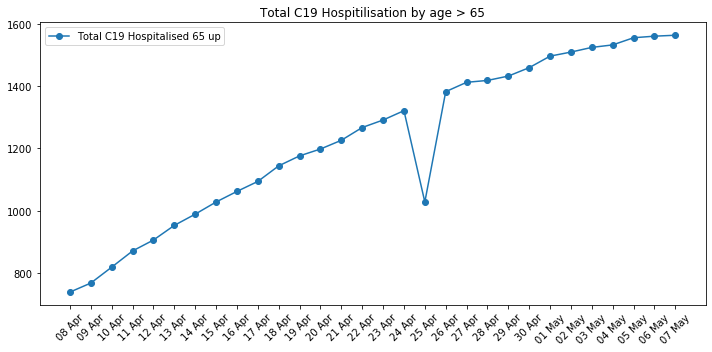

In [382]:
# Total C19 Hospitilisation by age > 65
x = df_hspc['Date']
fig,ax = plt.subplots()
plt.title("Total C19 Hospitilisation by age > 65")
plt.plot(x, df_hspc["HospitalisedAged65up"], label='Total C19 Hospitalised 65 up', marker='o')

monthyearFmt = mdates.DateFormatter('%d %b')
ax.xaxis.set_major_formatter(monthyearFmt)
ax.set_xticks(x)
plt.xticks(rotation=45)
plt.legend()
plt.minorticks_off()
plt.tight_layout()
plt.savefig("output/hospatilsation_total_by_age_greater_than_65.png")
plt.show()